# predicting penguins species 




<p style ='text-align: center'>
<img src="https://media.giphy.com/media/ehaMUMJMAPdQaCJHdH/giphy.gif" height="700" width="700" align="center">
</p> 

<a id='1945'></a>
# Introduction
In this module, you will explore population trends of adélie, chinstrap, and gentoo penguins in one area of the Antarctic Peninsula. These species are evolutionarily related; they all occupy the genus *Pygoscelis*, and are therefore commonly referred to as pygoscelids. Yet, although these species are closely related and live side-by-side in some areas, changes in the Antarctic ecosystem are affecting them very differently. Below, you can read some background information about each species before you begin exploring population data.  

<div>
<img src="attachment:Ad%C3%A9lie_Penguin_%285914013521%29.jpg" width="200" align='left' style="vertical-align:bottom;margin:0 px 30px"/>
</div>

### Adélie Penguin (*Pygoscelis adeliae*)

Adélie penguins are medium-sized penguins that live exclusively in Antarctic coasts and waters, unlike the other two pygoscelids. Adélies feed mostly on antarctic krill (*euphasia superba*), a species of small marine crustacean that is also eaten by some species of whales and seals. Physically, adélie penguins can be distinguished by the ring of white feathers around each eye.



<div>
<img src="attachment:Picture1.jpg" width="200" align='left'style="vertical-align:bottom;margin:0 px 30px"/>
</div>

### Chinstrap Penguin (*Pygoscelis antarctica*)

Chinstrap penguins are easily identifiable by their black "cap" of plumage and the thin band of black feathers which runs under their chins. This species has a large range, nesting on subantarctic and Antarctic islands as well as the Antarctic Penninsula itself. Like adélie  penguins, chinstraps are specialist predators of antarctic krill ; these tiny crustaceans comprise 95-99% of their diets!



<div>
<img src="attachment:512px-Gentoo_Penguin_%284313125472%29.jpg" width="200" align='left'style="vertical-align:bottom;margin:0 px 30px"/>
</div>


### Gentoo Penguin (*Pygoscelis papua*)

Gentoo penguins are the largest species of pygoscelid, and the third-largest species of penguin in the world. They inhabit the Antarctic Penninsula, as well as several subantarctic islands. Gentoo penguins are the fastest-swimming bird in the world, reaching speeds of 22 miles per hour. They form colonies only in ice-free areas, and can be distinguished from other pygoscelids by the white feathers above their eyes.



In [1]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## loading the dataset 

In [2]:
penguins = pd.read_csv("penguins_size_20k.csv")        

## preview of dataset

In [3]:
penguins      

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.868452,15.991125,200,3444,FEMALE
1,Chinstrap,Dream,46.348677,17.996925,203,3806,FEMALE
2,Chinstrap,Dream,52.399991,17.289610,195,3512,FEMALE
3,Chinstrap,Dream,48.770446,17.934441,198,3254,FEMALE
4,Chinstrap,Dream,45.472326,17.140081,196,3315,FEMALE
...,...,...,...,...,...,...,...
19995,Adelie,Torgersen,40.507481,20.047148,190,4209,NaN
19996,Adelie,Torgersen,35.392186,16.447666,181,3333,NaN
19997,Adelie,Torgersen,37.576485,16.870402,181,3423,NaN
19998,Adelie,Torgersen,35.067246,16.817847,186,3236,NaN


In [4]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,43.858238,17.147616,200.353700,4200.640850
std,5.432632,1.962735,14.098994,800.091748
min,28.948867,12.375907,166.000000,2434.000000
25%,39.126713,15.540768,189.000000,3541.000000
50%,44.105549,17.382965,197.000000,4065.000000
75%,48.399501,18.703301,213.000000,4764.000000
max,59.875605,23.218645,240.000000,6669.000000


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            20000 non-null  object 
 1   island             20000 non-null  object 
 2   culmen_length_mm   20000 non-null  float64
 3   culmen_depth_mm    20000 non-null  float64
 4   flipper_length_mm  20000 non-null  int64  
 5   body_mass_g        20000 non-null  int64  
 6   sex                19521 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


## Filling out empty enteries with fillna()

In [6]:
penguin=penguins
penguin.fillna(method='ffill', inplace=True)

In [7]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            20000 non-null  object 
 1   island             20000 non-null  object 
 2   culmen_length_mm   20000 non-null  float64
 3   culmen_depth_mm    20000 non-null  float64
 4   flipper_length_mm  20000 non-null  int64  
 5   body_mass_g        20000 non-null  int64  
 6   sex                20000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [8]:
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.868452,15.991125,200,3444,FEMALE
1,Chinstrap,Dream,46.348677,17.996925,203,3806,FEMALE
2,Chinstrap,Dream,52.399991,17.289610,195,3512,FEMALE
3,Chinstrap,Dream,48.770446,17.934441,198,3254,FEMALE
4,Chinstrap,Dream,45.472326,17.140081,196,3315,FEMALE
...,...,...,...,...,...,...,...
19995,Adelie,Torgersen,40.507481,20.047148,190,4209,FEMALE
19996,Adelie,Torgersen,35.392186,16.447666,181,3333,FEMALE
19997,Adelie,Torgersen,37.576485,16.870402,181,3423,FEMALE
19998,Adelie,Torgersen,35.067246,16.817847,186,3236,FEMALE


## Description of class

In [9]:
print(penguins.groupby('species').size())

species
Adelie       8911
Chinstrap    3880
Gentoo       7209
dtype: int64


## Dataset visualization

<Axes: >

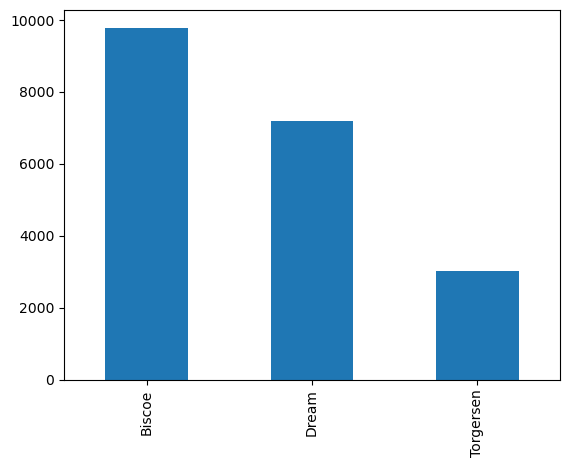

In [10]:
penguin.island.value_counts().plot(kind='bar')  # no. of species in each island

In [11]:
penguin.sex.value_counts()     # Gender count

FEMALE    10172
MALE       9828
Name: sex, dtype: int64

## Relation of species with different features in the dataset

<Axes: xlabel='species', ylabel='body_mass_g'>

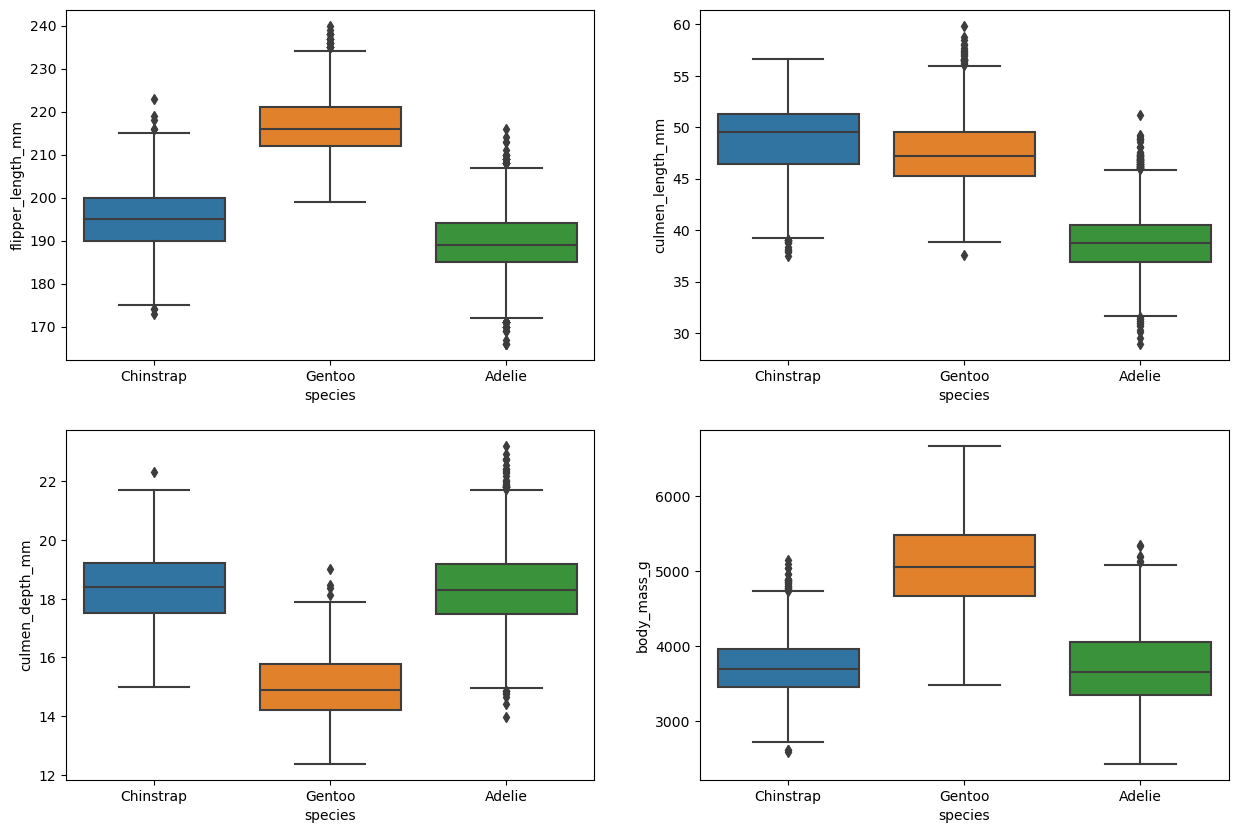

In [12]:
#BOX plot
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='species',y='flipper_length_mm',data=penguin)    
plt.subplot(2,2,2)    
sns.boxplot(x='species',y='culmen_length_mm',data=penguin)    
plt.subplot(2,2,3)    
sns.boxplot(x='species',y='culmen_depth_mm',data=penguin)    
plt.subplot(2,2,4)    
sns.boxplot(x='species',y='body_mass_g',data=penguin)  


## Pair plot

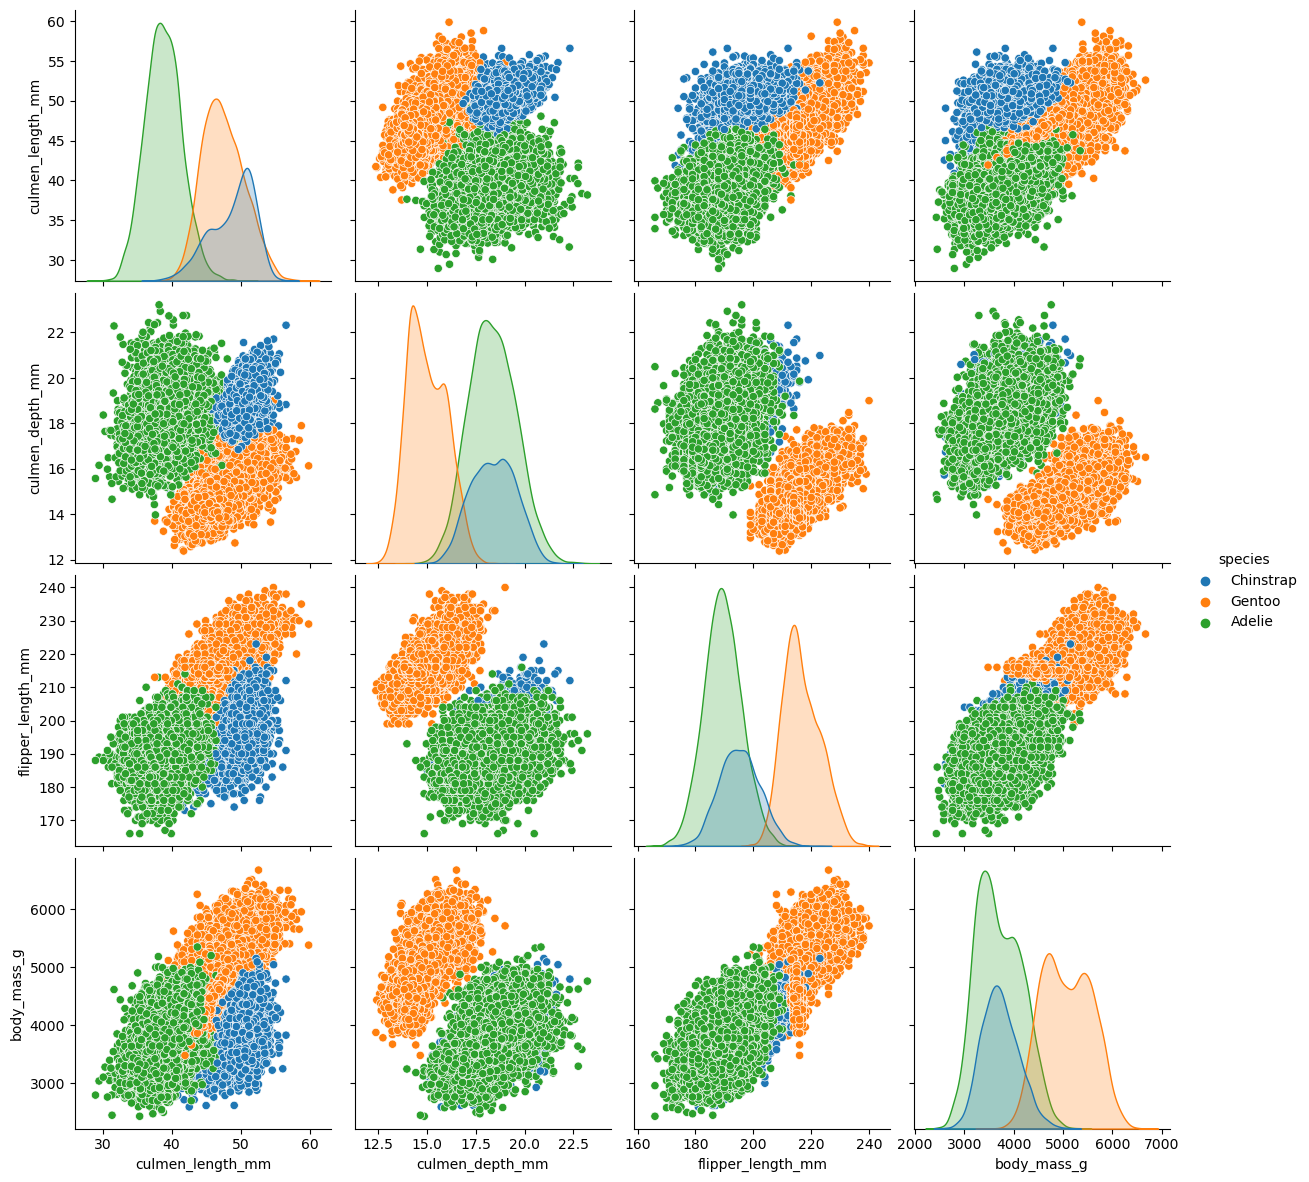

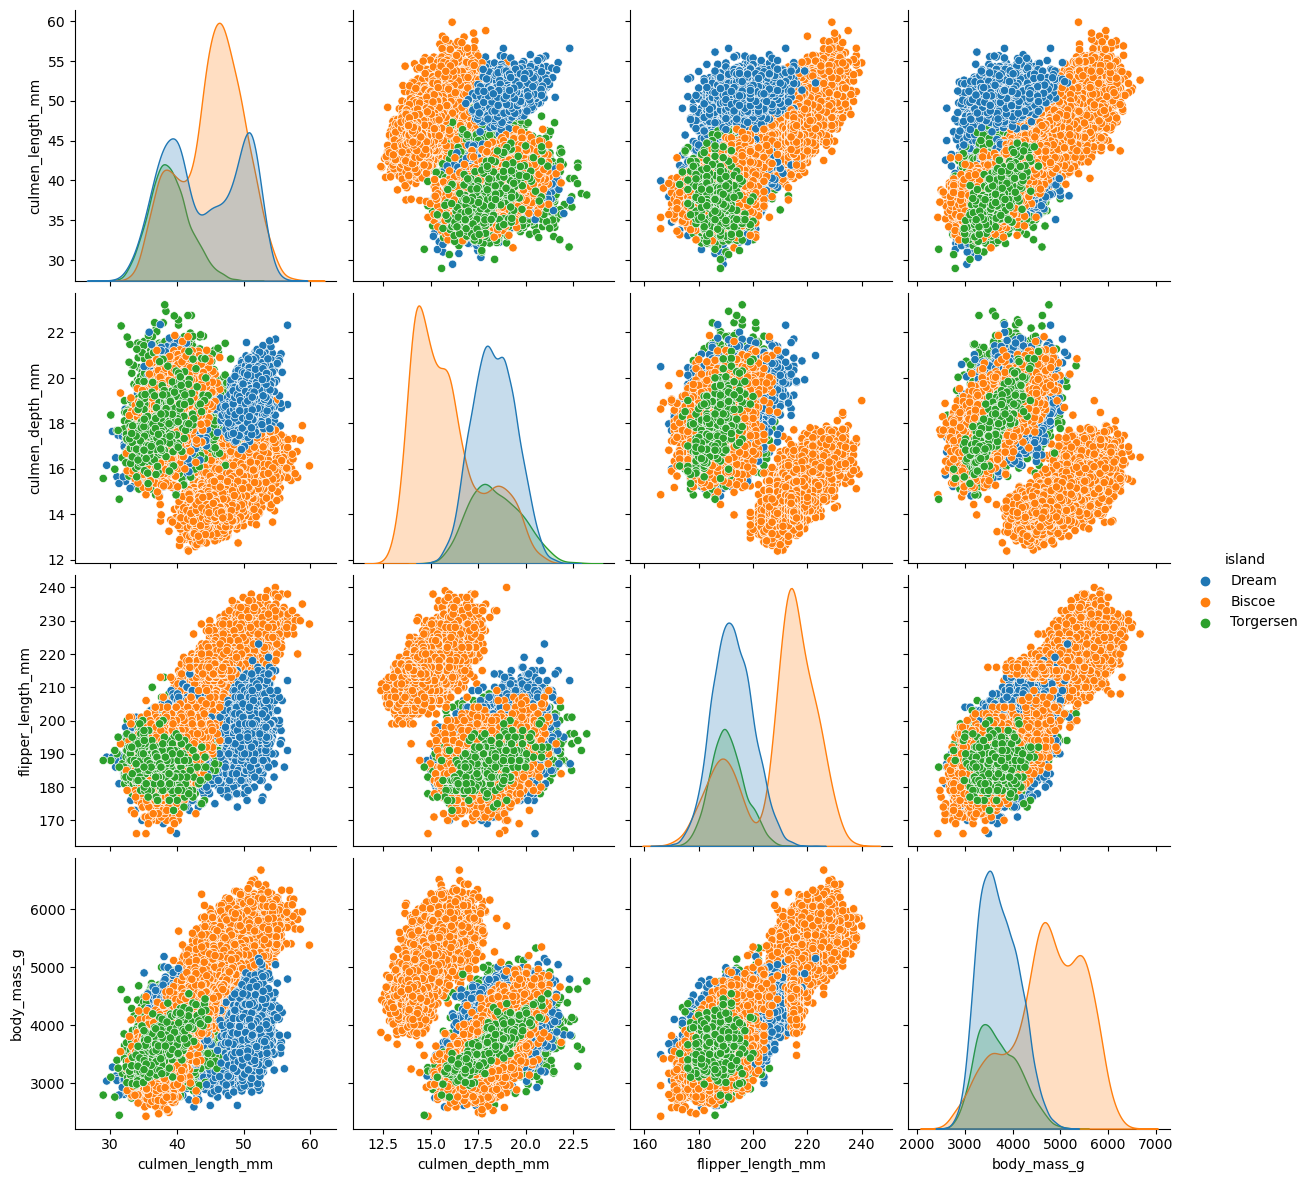

In [13]:
# The pair plot used to figure out a distribution of single variables and the relationship between two variables 
# here it is also sperate with different species for clear picture
sns.pairplot(penguin, hue='species', height=3, diag_kind="kde")    
sns.pairplot(penguin,hue='island',  height=3) 

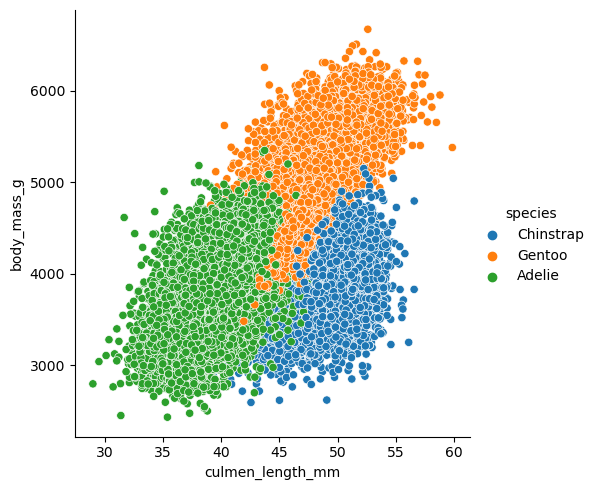

In [14]:
#looking at body mass relation with culmen_length closely
sns.relplot(data=penguin, x='culmen_length_mm', y='body_mass_g', hue="species")

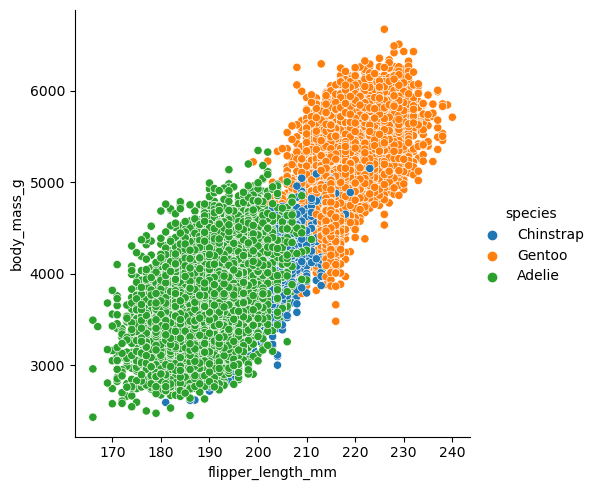

In [15]:
#looking at body mass relation with flipper_length closely
sns.relplot(data=penguin, x='flipper_length_mm', y='body_mass_g', hue="species")

## looking for correlations

In [16]:
corr_matrix=penguin.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10348\1296947210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=penguin.corr()


In [17]:
corr_matrix['culmen_length_mm'].sort_values(ascending=False)

culmen_length_mm     1.000000
flipper_length_mm    0.660157
body_mass_g          0.597155
culmen_depth_mm     -0.245701
Name: culmen_length_mm, dtype: float64

## Mean of features with different species, island and sex

In [18]:
penguin.groupby('species').mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10348\3146824139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguin.groupby('species').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.778981,18.342912,189.379755,3702.974863
Chinstrap,48.771295,18.388549,195.180155,3723.835825
Gentoo,47.492390,15.002229,216.703010,5072.426828


In [19]:
penguin.groupby('island').mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10348\27900915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguin.groupby('island').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.240115,15.885862,209.185681,4713.703401
Dream,44.065895,18.333261,192.407743,3712.625679
Torgersen,38.897494,18.415688,190.639696,3699.003303


In [20]:
penguin.groupby('sex').mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10348\1365774741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguin.groupby('sex').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.008506,16.450437,196.695438,3856.679414
MALE,45.772715,17.869198,204.140008,4556.641636


## Train and validate dataset

In [21]:
from sklearn.preprocessing import LabelEncoder        # separating dataset in 3 parts X0, Z are features Y is prediction labels
X0=penguin[['culmen_length_mm', 'flipper_length_mm', 'body_mass_g', 'culmen_depth_mm']]
Y=penguin[['species']] 
Z=penguin[['island','sex']] 

In [22]:
z2=Z.apply(LabelEncoder().fit_transform)  # label encoding island,sex column

In [23]:
X=pd.concat([X0,z2], axis=1) # combining z2 and X0 after label encoding

In [24]:
X      #preview

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
0,46.868452,200,3444,15.991125,1,0
1,46.348677,203,3806,17.996925,1,0
2,52.399991,195,3512,17.289610,1,0
3,48.770446,198,3254,17.934441,1,0
4,45.472326,196,3315,17.140081,1,0
...,...,...,...,...,...,...
19995,40.507481,190,4209,20.047148,2,0
19996,35.392186,181,3333,16.447666,2,0
19997,37.576485,181,3423,16.870402,2,0
19998,35.067246,186,3236,16.817847,2,0


## Train- Test splitting

In [25]:
from sklearn.model_selection import train_test_split
# splitting dataset- keeping 75% for training and 25% for testing 
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [26]:
print("rows in train set-",len(y_train_set))
print("rows in test set-",len(y_test_set))

rows in train set- 15000
rows in test set- 5000


In [27]:
y_train_set   # preview

,species
5514,Gentoo
1266,Chinstrap
5864,Adelie
15865,Adelie
12892,Adelie
...,...
11284,Chinstrap
11964,Chinstrap
5390,Gentoo
860,Chinstrap


## label encoding species (prediction labels)

In [28]:
y1=y_train_set.apply(LabelEncoder().fit_transform)
y2=y_test_set.apply(LabelEncoder().fit_transform)

## Scaling the dataset using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
x_new_train= std.fit_transform(x_train_set)
x_new_test= std.fit_transform(x_test_set)

In [30]:
x_train_set

,culmen_length_mm,flipper_length_mm,body_mass_g,culmen_depth_mm,island,sex
5514,46.531577,224,5699,15.982054,0,1
1266,49.290827,189,3503,16.961631,1,0
5864,43.588579,196,3651,18.772208,2,1
15865,36.740661,182,4173,17.935924,1,1
12892,37.185929,182,3513,17.670897,1,0
...,...,...,...,...,...,...
11284,50.080521,206,4081,17.987956,1,1
11964,47.986887,203,3994,18.515993,1,1
5390,54.844412,218,5313,15.685624,0,1
860,43.526343,193,3596,16.595578,1,0


In [31]:
x_new_train

array([[ 0.48966966,  1.68315397,  1.87338531, -0.59814553, -0.91331675,
         1.01694352],
       [ 0.99691529, -0.79848858, -0.86655833, -0.0989488 ,  0.46576028,
        -0.98333878],
       [-0.05135522, -0.30216007, -0.68189911,  0.82373047,  1.84483732,
         1.01694352],
       ...,
       [ 2.01785656,  1.25772953,  1.39177409, -0.74920792, -0.91331675,
         1.01694352],
       [-0.0627965 , -0.51487229, -0.75052247, -0.28549103,  0.46576028,
        -0.98333878],
       [-0.53444621, -0.16035192, -0.23023262,  0.40174603,  0.46576028,
         1.01694352]])

## Training the model / selecting desired model for predictions

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Adding noise to x_new_train
noise_factor = 0.1  # Adjust this factor to control the amount of noise
noise = np.random.normal(0, noise_factor, x_new_train.shape)
x_new_train_noisy = x_new_train + noise

# Mislabeling some data points in y1
mislabeling_ratio = 0.1  # Adjust this ratio to control the amount of mislabeling
num_mislabels = int(len(y1) * mislabeling_ratio)
indices_to_mislabel = np.random.choice(len(y1), num_mislabels, replace=False)
mislabels = np.random.choice([0, 1, 2], num_mislabels)  # Assuming y1 is one-hot encoded
y1_mislabels = y1.values.ravel().copy()
y1_mislabels[indices_to_mislabel] = mislabels

# Evaluate models again with noisy data and mislabeled data
models = []       
models.append(('DTC', DecisionTreeClassifier()))    
models.append(('LoR', LogisticRegression()))    
models.append(('KNC', KNeighborsClassifier()))  
models.append(('RFC', RandomForestClassifier()))


results = []    
names = []    
for name, model in models:       
    cv = cross_val_score(model, x_new_train_noisy, y1_mislabels, scoring="accuracy")
    results.append(cv)    
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv.mean(), cv.std())    
    print(msg)


DTC: 0.857733 (0.005729)
LoR: 0.922400 (0.005627)
KNC: 0.929067 (0.004664)
RFC: 0.930267 (0.004828)


## Algorithm comparison through graphs

<Figure size 1500x1000 with 0 Axes>

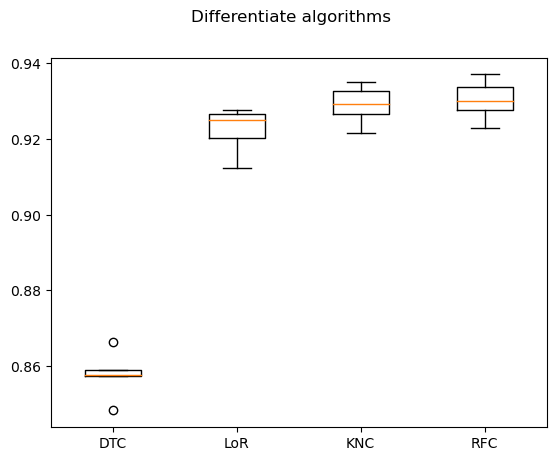

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))    
fig = plt.figure()    
fig.suptitle('Differentiate algorithms')    
ax = fig.add_subplot(111)    
plt.boxplot(results)    
ax.set_xticklabels(names)    
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Adding noise to the datasets
noise_factor = 0.1  # Adjust this factor to control the amount of noise

# Generate noise
noise_train = np.random.normal(0, noise_factor, x_new_train.shape)
noise_test = np.random.normal(0, noise_factor, x_new_test.shape)

# Add noise to the datasets
x_new_train_noisy = x_new_train + noise_train
x_new_test_noisy = x_new_test + noise_test

# Mislabeling some data points
mislabeling_ratio = 0.1  # Adjust this ratio to control the amount of mislabeling
num_mislabels_train = int(len(y1) * mislabeling_ratio)
num_mislabels_test = int(len(y2) * mislabeling_ratio)

# Generate mislabels
mislabels_train = np.random.choice([0, 1, 2], num_mislabels_train)
mislabels_test = np.random.choice([0, 1, 2], num_mislabels_test)

# Apply mislabels
y1_mislabels = y1.values.ravel().copy()
y2_mislabels = y2.values.ravel().copy()

indices_to_mislabel_train = np.random.choice(len(y1), num_mislabels_train, replace=False)
indices_to_mislabel_test = np.random.choice(len(y2), num_mislabels_test, replace=False)

y1_mislabels[indices_to_mislabel_train] = mislabels_train
y2_mislabels[indices_to_mislabel_test] = mislabels_test

# Initialize and fit the RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_new_train_noisy, y1_mislabels)

# Predictions
predictions = RFC.predict(x_new_test_noisy)

# Calculate and print accuracy
print(f"Accuracy: {accuracy_score(y2_mislabels, predictions)}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y2_mislabels, predictions))

# Classification report
print("\nClassification Report:")
print(classification_report(y2_mislabels, predictions))


Accuracy: 0.935

Confusion Matrix:
[[2073   30   50]
 [  87  881   73]
 [  61   24 1721]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2153
           1       0.94      0.85      0.89      1041
           2       0.93      0.95      0.94      1806

    accuracy                           0.94      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.94      0.94      0.93      5000



In [35]:
y2

,species
10650,1
2041,2
8668,2
1114,1
13902,0
...,...
3761,2
5478,2
5805,0
10084,2


In [36]:
predictions

array([1, 2, 2, ..., 0, 2, 0])

In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the test dataset y2 and the predictions
accuracy = accuracy_score(y2_mislabels, predictions)

print(f"Accuracy on test dataset (y2): {accuracy * 100:.2f}%")


Accuracy on test dataset (y2): 93.50%


## Testing the new data

In [38]:
species=["Adelie","Chinstrap","Gentoo"]

In [43]:
import numpy as np

# Mean and standard deviation for standardization
mean = np.array([[43.920930, 200.936047, 4201.090116, 17.143605, 0.662791, 1.508721]])
std = np.array([[5.450030, 14.042064, 802.213531, 1.978342, 0.726194, 0.506442]])

# Test data
X_new = np.array([[51.7, 213, 4550, 19, 0, 2]])


# Predictions
i=0
X_new = np.array([[51.7, 213, 4550, 19 , 0, 2]])
for v in X_new:
    ct=(v-mean)/std
    stxnew=ct
    print(stxnew)
    if i==6:
        break
p = RFC.predict(stxnew)




[[ 1.42734444  0.85912961  0.43493393  0.93835899 -0.91269137  0.97005975]]


## Validating the prediction

In [44]:
print(species[int(p)])

Gentoo
